# Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNN) are a class of deep learning models, most commonly applied to analyzing visual imagery. They are also known as ConvNets.

## How it Works

CNNs work by applying a series of filters to the raw pixel data of an image to create a map of features. These features are then passed through a series of convolutional layers, where each layer learns to identify different features in the image.

The process starts with the convolutional layer, where the network applies several filters to the input and creates feature maps. The network then applies a ReLU (Rectified Linear Unit) activation function to add non-linearity to the network.

The next step is pooling or subsampling, which reduces the dimensionality of each feature map but retains the most important information. After several convolutional and pooling layers, the high-level reasoning in the neural network is done via fully connected layers.

## Use Cases

CNNs have a wide range of applications, including:

- **Image and Video Recognition**: CNNs can be used for image classification, object detection, and even video recognition. They have been successful in identifying faces, objects, and traffic signs apart from powering vision in robots and self-driving cars.

- **Medical Image Analysis**: CNNs are used in brain image segmentation, organ recognition, and disease detection from various medical scans.

- **Natural Language Processing**: Although not a common use case, CNNs can be used in Natural Language Processing to capture the spatial structure in the data by employing larger convolutional windows.

## Limitations

Despite their advantages, CNNs also have some limitations:

- **Need for Large Amounts of Data**: To perform well, CNNs typically require large amounts of labeled data.

- **Computational Intensity**: CNNs require significant computational resources, which can be a challenge for real-time applications.

- **Interpretability**: Like other deep learning models, CNNs can be seen as "black boxes" and can be difficult to interpret. This can make it challenging to understand why a particular prediction was made.

# Сверточные нейронные сети (CNN)

Сверточные нейронные сети (CNN) - это класс моделей глубокого обучения, наиболее часто применяемых для анализа визуальных изображений. Они также известны как ConvNets.

## Как это работает

CNN работают, применяя ряд фильтров к исходным пиксельным данным изображения, чтобы создать карту признаков. Эти признаки затем проходят через ряд сверточных слоев, где каждый слой учится идентифицировать различные признаки на изображении.

Процесс начинается со сверточного слоя, где сеть применяет несколько фильтров к входу и создает карты признаков. Затем сеть применяет функцию активации ReLU (Rectified Linear Unit) для добавления нелинейности в сеть.

Следующим шагом является пулинг или подвыборка, которые уменьшают размерность каждой карты признаков, но сохраняют наиболее важную информацию. После нескольких сверточных и пулинговых слоев, высокоуровневое рассуждение в нейронной сети выполняется через полностью связанные слои.

## Варианты использования

У CNN есть широкий спектр применений, включая:

- **Распознавание изображений и видео**: CNN могут использоваться для классификации изображений, обнаружения объектов и даже распознавания видео. Они успешно идентифицировали лица, объекты и дорожные знаки, кроме того, они обеспечивают зрение роботов и автомобилей с автопилотом.

- **Анализ медицинских изображений**: CNN используются для сегментации изображений мозга, распознавания органов и обнаружения болезней на различных медицинских сканах.

- **Обработка естественного языка**: Хотя это не является обычным вариантом использования, CNN могут использоваться в обработке естественного языка для захвата пространственной структуры в данных с использованием более крупных сверточных окон.

## Ограничения

Несмотря на их преимущества, у CNN также есть некоторые ограничения:

- **Необходимость большого количества данных**: Для хорошей работы CNN обычно требуются большие объемы размеченных данных.

- **Вычислительная интенсивность**: CNN требуют значительных вычислительных ресурсов, что может быть проблемой для приложений в реальном времени.

- **Интерпретируемость**: Как и другие модели глубокого обучения, CNN могут рассматриваться как "черные ящики" и могут быть сложными для интерпретации. Это может затруднить понимание причин, по которым был сделан определенный прогноз.

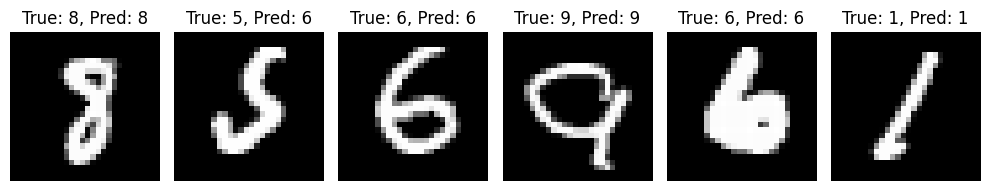

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       980
           1       0.95      0.92      0.94      1135
           2       0.88      0.85      0.87      1032
           3       0.89      0.85      0.87      1010
           4       0.89      0.88      0.89       982
           5       0.85      0.85      0.85       892
           6       0.89      0.93      0.91       958
           7       0.91      0.86      0.89      1028
           8       0.72      0.86      0.78       974
           9       0.91      0.80      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



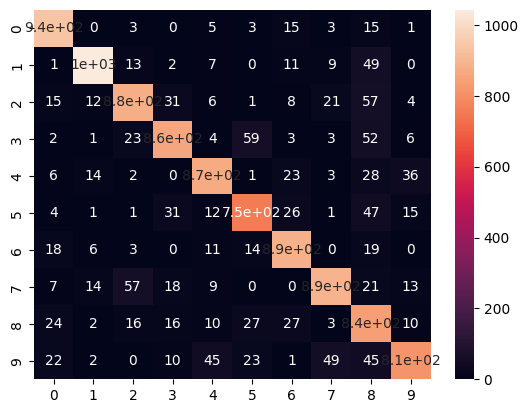

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class CNN(nn.Module):
    """
    Define a Convolutional Neural Network (CNN) for classification.
    """
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.view(-1, 320)
        x = self.fc(x)
        return x

class Dataset:
    """
    A class to perform data loading and preprocessing for MNIST dataset.
    """
    def __init__(self):
        self.load_data()

    def load_data(self):
        """
        Load and preprocess the MNIST dataset.
        """
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        self.train_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=True, download=True, transform=transform),
            batch_size=64, shuffle=True)
        self.test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, transform=transform),
            batch_size=1000, shuffle=True)

def predict(model, image, device):
    """
    Predict the class of a single image.
    """
    model.eval()
    with torch.no_grad():
        output = model(image.unsqueeze(0).to(device))
        _, predicted = torch.max(output.data, 1)
    return predicted.item()

def visualize_predictions(model, dataset, device, num_images=6):
    """
    Visualize predictions for a few images from the test set in a grid.
    """
    model.eval()
    images, labels = next(iter(dataset.test_loader))
    fig, axs = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        image = images[i].to(device)
        label = labels[i]
        prediction = predict(model, image, device)
        axs[i].imshow(image.cpu().squeeze().numpy(), cmap='gray')
        axs[i].set_title(f'True: {label}, Pred: {prediction}')
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

# Usage
use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")

dataset = Dataset()
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1):
    for batch_idx, (data, target) in enumerate(dataset.train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

correct = 0
total = 0
targets = []
predictions = []
for data, target in dataset.test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    correct += (predicted == target).sum().item()
    targets.extend(target.cpu())
    predictions.extend(predicted.cpu())

# Visualize predictions
visualize_predictions(model, dataset, device)

print('Classification Report:')
print(classification_report(targets, predictions))

cm = confusion_matrix(targets, predictions)
sns.heatmap(cm, annot=True)
plt.show()


The classification report provides a breakdown of each class's performance in terms of precision, recall, and f1-score. Here's what each of these terms mean:

- **Precision**: The ratio of true positive predictions (correctly predicted as positive) to the total positive predictions (both correctly and incorrectly predicted). It's a measure of a classifier's exactness. Low precision indicates a high number of false positives.

- **Recall**: The ratio of true positive predictions to the total actual positives. It's a measure of a classifier's completeness. Low recall indicates a high number of false negatives.

- **F1-Score**: The harmonic mean of precision and recall. It tries to find the balance between precision and recall. It's a good metric to consider if both precision and recall need to be high.

- **Support**: The number of samples of the true response that lie in that class.

- **Macro Avg**: The average of the metric for each class, treating each class equally, regardless of their size.

- **Weighted Avg**: The average of the metric for each class, weighted by the number of samples in each class.

- **Accuracy**: The ratio of correct predictions to total predictions.

In this case, the model has an accuracy of 0.88, which means it made correct predictions for 88% of the input samples. The precision, recall, and F1-score for each class give more detailed information about the model's performance. For example, the model has high precision (0.97) for class 0, which means it's very good at predicting class 0 without producing many false positives. However, it has lower precision (0.77) for class 5, which means it produces more false positives when predicting class 5. Similarly, the recall and F1-score for each class can be interpreted. The confusion matrix provides a visual representation of the model's performance, showing the true and false positives and negatives for each class.

Отчет о классификации предоставляет разбивку производительности каждого класса в терминах точности, полноты и F1-оценки. Вот что означает каждый из этих терминов:

- **Точность (Precision)**: Это отношение истинных положительных прогнозов (правильно предсказанных как положительные) к общему числу положительных прогнозов (правильно и неправильно предсказанных). Это мера точности классификатора. Низкая точность указывает на большое количество ложных срабатываний.

- **Полнота (Recall)**: Это отношение истинных положительных прогнозов к общему числу реальных положительных результатов. Это мера полноты классификатора. Низкая полнота указывает на большое количество ложных отрицательных результатов.

- **F1-оценка (F1-Score)**: Это гармоническое среднее между точностью и полнотой. Она пытается найти баланс между точностью и полнотой. Это хороший показатель, который следует учитывать, если необходимо, чтобы и точность, и полнота были высокими.

- **Поддержка (Support)**: Это количество образцов истинного ответа, которые лежат в этом классе.

- **Среднее значение по макро (Macro Avg)**: Это среднее значение метрики для каждого класса, при этом каждый класс рассматривается равнозначно, независимо от его размера.

- **Взвешенное среднее (Weighted Avg)**: Это среднее значение метрики для каждого класса, взвешенное по количеству образцов в каждом классе.

- **Точность (Accuracy)**: Это отношение правильных прогнозов к общему числу прогнозов.

В данном случае модель имеет точность 0,88, что означает, что она сделала правильные прогнозы для 88% входных образцов. Точность, полнота и F1-оценка для каждого класса дают более подробную информацию о производительности модели. Например, модель имеет высокую точность (0,97) для класса 0, что означает, что она очень хорошо предсказывает класс 0 без создания многих ложных срабатываний. Однако у нее ниже точность (0,77) для класса 5, что означает, что она создает больше ложных срабатываний при прогнозировании класса 5. Аналогично можно интерпретировать полноту и F1-оценку для каждого класса. Матрица ошибок предоставляет визуальное представление производительности модели, показывая истинные и ложные положительные и отрицательные результаты для каждого класса.

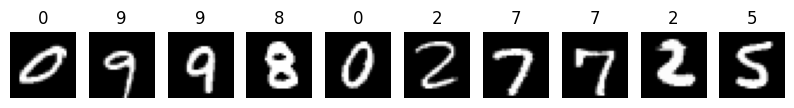

In [5]:
# Get the first batch of test data
data, target = next(iter(dataset.test_loader))

# Get the model's predictions
output = model(data)
_, predicted = torch.max(output.data, 1)

# Plot the first few images with their predicted labels
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(data[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f'{predicted[i]}')
    ax.axis('off')
plt.show()
